# 数组的排序
## NumPy中的快速排序： np.sort和np.argsort
尽管 Python 有内置的 sort 和 sorted 函数可以对列表进行排序，但是这里不会介绍这两个函数，因为 NumPy 的 np.sort 函数实际上效率更高。默认情况下， np.sort 的排序算法是快速排序，其算法复杂度为$O[N log N]$ ，另外也可以选择归并排序和堆排序。对于大多数应用场景，默认的快速排序已经足够高效了。

如果想在不修改原始输入数组的基础上返回一个排好序的数组，可以使用 np.sort：

In [2]:
import numpy as np
x=np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

如果希望用排好序的数组替代原始数组，可以使用数组的`sort`方法：

In [4]:
x.sort()
x

array([1, 2, 3, 4, 5])

另外一个相关的函数是 argsort，该函数返回的是原始数组排好序的索引值：

In [5]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


以上结果的第一个元素是数组中最小元素的索引值，第二个值给出的是次小元素的索引值，以此类推。这些索引值可以被用于（通过花哨的索引）创建有序的数组：

In [8]:
x[i]

array([1, 2, 3, 4, 5])

沿着某一行/列排序：

In [9]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [10]:
# 对X的每一列排序
np.sort(X,axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [11]:
# 对X每一行排序
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## 部分排序： 分隔
有时候我们不希望对整个数组进行排序，仅仅希望找到数组中第 K 小的值， NumPy 的np.partition 函数提供了该功能。 np.partition 函数的输入是数组和数字 K，输出结果是一个新数组，最左边是第 K 小的值，往右是任意顺序的其他值：

In [12]:
x=np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

请注意，结果数组中前三个值是数组中最小的三个值，剩下的位置是原始数组剩下的值。**在这两个分隔区间中，元素都是任意排列的。**

In [14]:
np.partition(X,2,axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

输出结果是一个数组，该数组每一行的前两个元素是该行最小的两个值，每行的其他值分布在剩下的位置。

## 示例： K个最近邻

In [15]:
X=rand.rand(10,2)

E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


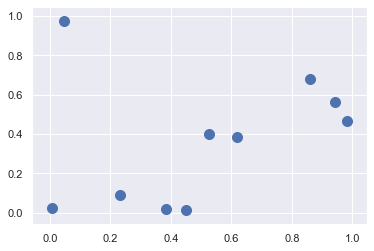

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 设置画图风格
plt.scatter(X[:, 0], X[:, 1], s=100);

In [26]:
# 计算两点间距离的平方
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [27]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


如果我们仅仅关心 k 个最近邻，那么唯一需要做的是分隔每一行，这样最小的 k + 1 的平方距离将排在最前面，其他更长的距离占据矩阵该行的其他位置。可以用 np.argpartition 函数实现：

In [ ]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

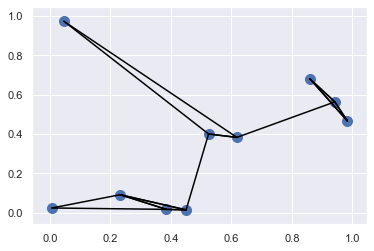

In [36]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 画一条从X[i]到X[j]的线段
        # 用zip方法实现：
        plt.plot(*zip(X[j], X[i]), color='black')